In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Initialize 
t0 = 0
tf = 45
#figure out how to make this in periods or 1/w
N = 100
dt = (tf-t0)/N
theta_0 = .2
vel_init = 0
visc = 1
A = 1.5
womega = 2/3

In [3]:
def func1(x1,x2,t):
    return x2
def func2(x1,x2,t):
    return -visc*x2-np.sin(x1)
def rk4(x1_0,x2_0,time):
    k11 = dt*func1(x1_0,x2_0,time)
    k12 = dt*func2(x1_0,x2_0,time)
    k21 = dt*func1(x1_0 + k11*.5,x2_0 + k12*.5,time+dt*.5)
    k22 = dt*func2(x1_0 + k11*.5,x2_0 + k12*.5,time+dt*.5)
    k31 = dt*func1(x1_0 + k21*.5,x2_0 + k22*.5,time+dt*.5)
    k32 = dt*func2(x1_0 + k21*.5,x2_0 + k22*.5,time+dt*.5)
    k41 = dt*func1(x1_0 + k31,x2_0 + k32,time + dt)
    k42 = dt*func2(x1_0 + k31,x2_0 + k32,time + dt)
    x1_1 = x1_0 + (1/6)*(k11+k21+k31+k41)
    x2_1 = x2_0 + (1/6)*(k12+k22+k32+k42)
    return (x1_1,x2_1)

In [25]:
def eulerfunc(viscosity,Netpoints):
    #Initialize 
    t0 = 0
    tf = 45
    #figure out how to make this in periods or 1/w
    N = Netpoints
    dt = (tf-t0)/N
    theta_0 = .2
    vel_init = 0
    visc = viscosity
    #make the empty vectors
    t = np.arange(0.0,tf,dt)
    r = np.zeros(len(t))
    v = np.zeros(len(t))
    a = np.zeros(len(t))
    #set initial conditions
    r[0] = theta_0
    v[0] = vel_init
    a[0] = -np.sin(r[0])-v[0]*(visc)
    #euler cromer babyyy
    for i in range(len(t)-1):
        a[i+1] = -np.sin(r[i])-v[i]*(visc)
        v[i+1] = v[i]+dt*a[i]
        r[i+1] = r[i]+dt*v[i+1]
    #plot 
    ax = plt.figure()
    #pos vs time
    plt.subplot(121)
    plt.plot(t,r)
    plt.title("Time vs. Angle")
    plt.ylabel("Angle (rad)")
    plt.xlabel("Time (sec)")
    #velocity vs time
    plt.subplot(122)
    plt.plot(r,v)
    plt.title("Angle vs. Velocity")
    plt.ylabel("Velocity (rad/sec)")
    plt.xlabel("Angle (rad)")
    plt.subplots_adjust(wspace = .5)
    ax.set_figwidth(15)
    ax.suptitle("Viscosity: " + str(viscosity) + "  Meshpoints: " + str(Netpoints), fontsize=10)
    plt.show()

In [26]:
def rungekuttafunc(viscosity,Netpoints):
    #Initialize 
    t0 = 0
    tf = 45
    #figure out how to make this in periods or 1/w
    N = Netpoints
    dt = (tf-t0)/N
    theta_0 = .2
    vel_init = 0
    visc = viscosity
    #rk4 
    t = np.arange(0.0,tf,dt)
    state = np.zeros((N,2))
    state[0,0], state[0,1] = theta_0, vel_init
    for i in range(N-1):
        state[i+1,0],state[i+1,1] = rk4(state[i,0],state[i,1],t[i])
    #plot 
    ax = plt.figure()
    #pos vs time
    plt.subplot(121)
    plt.plot(t,state[:,0])
    plt.title("Time vs. Angle")
    plt.ylabel("Angle (rad)")
    plt.xlabel("Time (sec)")
    #velocity vs time
    plt.subplot(122)
    plt.plot(state[:,0],state[:,1])
    plt.title("Angle vs. Velocity")
    plt.ylabel("Velocity (rad/sec)")
    plt.xlabel("Angle (rad)")
    plt.subplots_adjust(wspace = .5)
    ax.set_figwidth(15)
    ax.suptitle("Viscosity: " + str(viscosity) + "  Meshpoints: " + str(Netpoints), fontsize=10)
    plt.show()

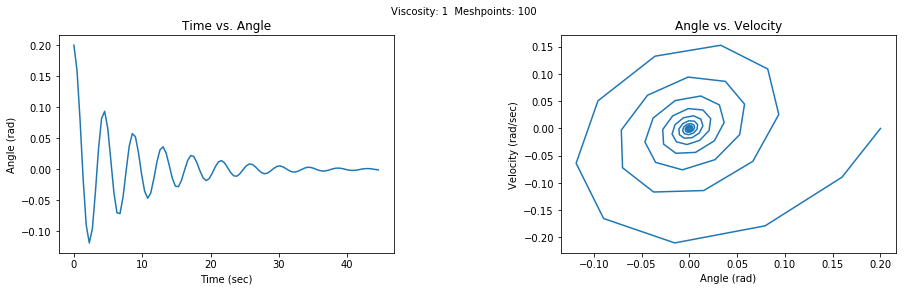

In [27]:
eulerfunc(1,100)

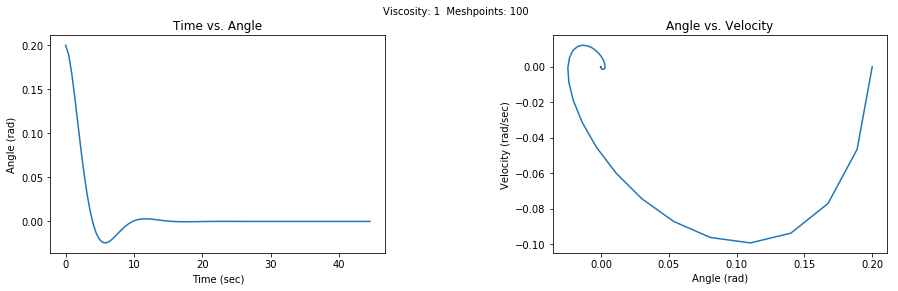

In [28]:
rungekuttafunc(1,100)

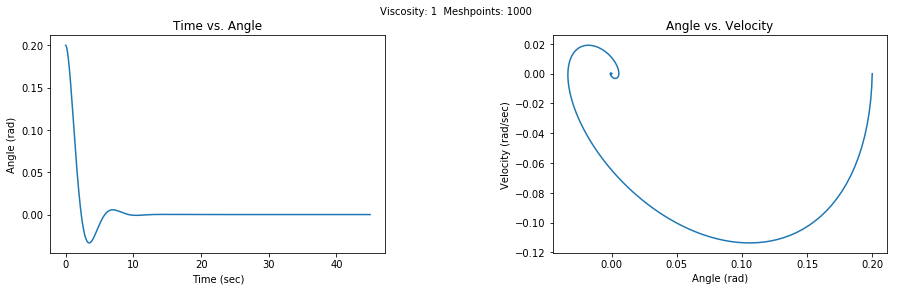

In [29]:
eulerfunc(1,1000)

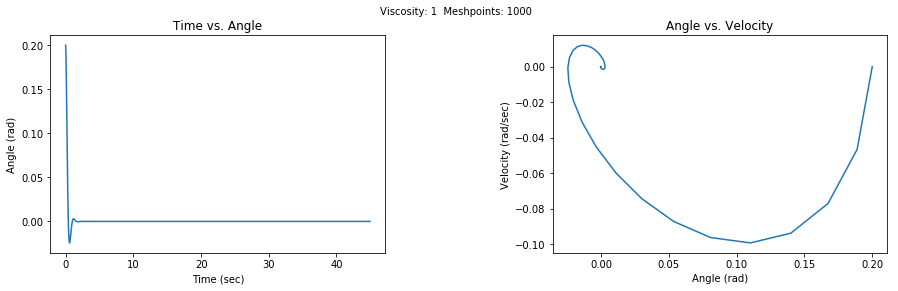

In [30]:
rungekuttafunc(1,1000)

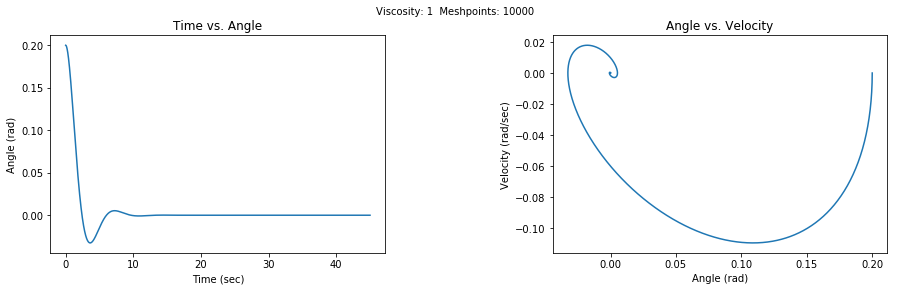

In [31]:
eulerfunc(1,10000)

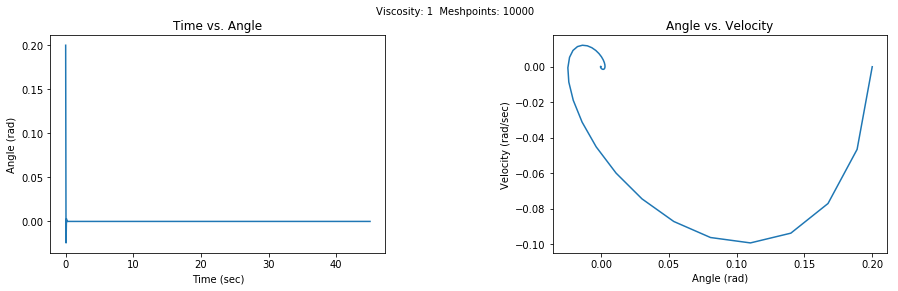

In [32]:
rungekuttafunc(1,10000)

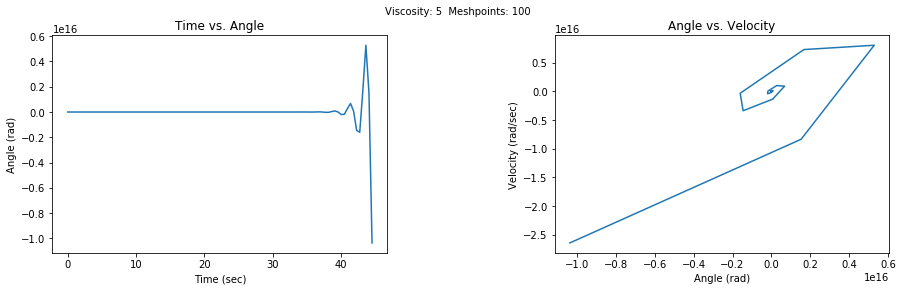

In [33]:
eulerfunc(5,100)

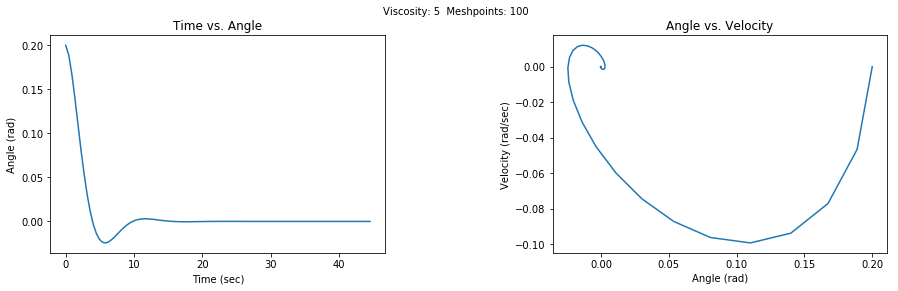

In [34]:
rungekuttafunc(5,100)

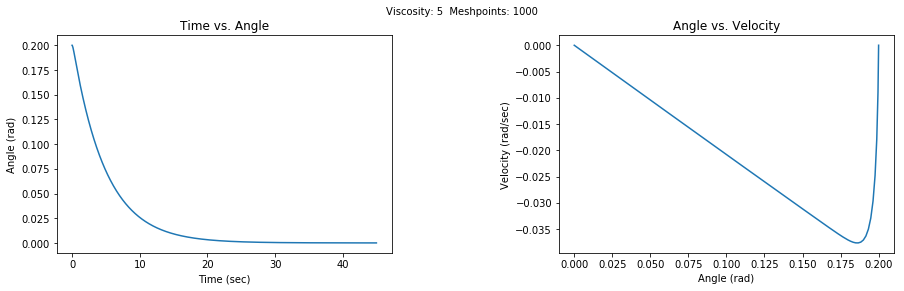

In [35]:
eulerfunc(5,1000)

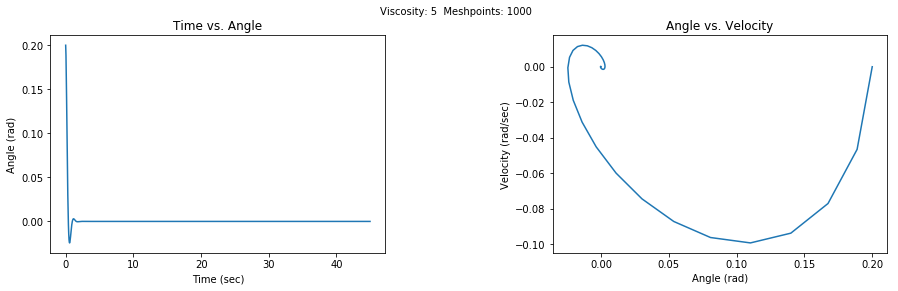

In [36]:
rungekuttafunc(5,1000)

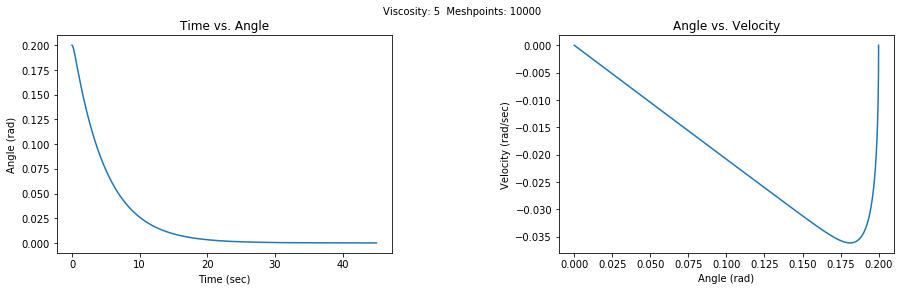

In [37]:
eulerfunc(5,10000)

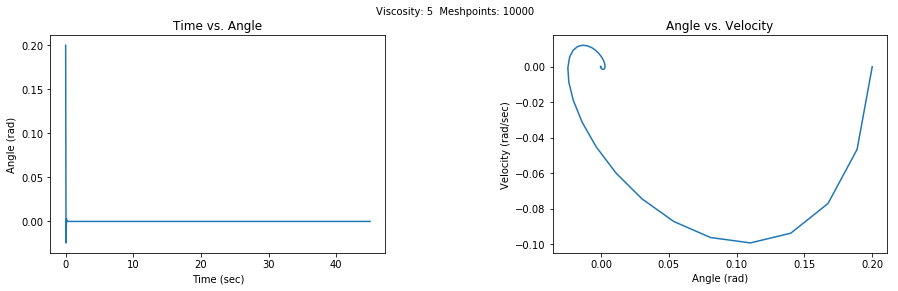

In [38]:
rungekuttafunc(5,10000)

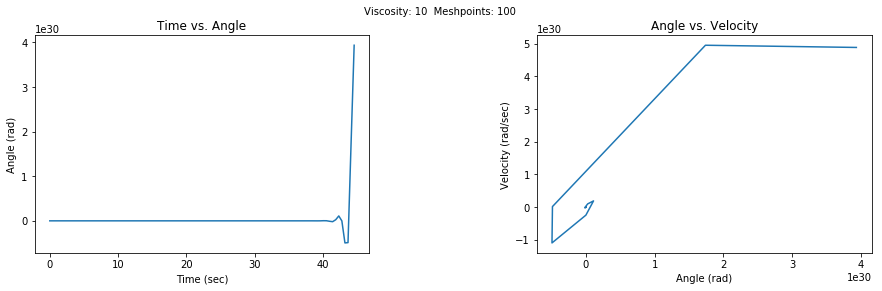

In [39]:
eulerfunc(10,100)

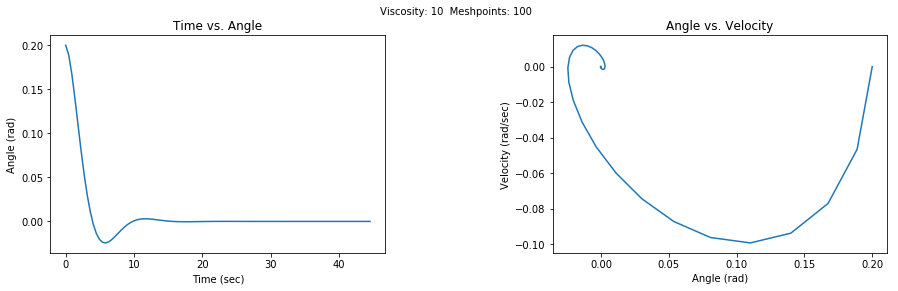

In [40]:
rungekuttafunc(10,100)

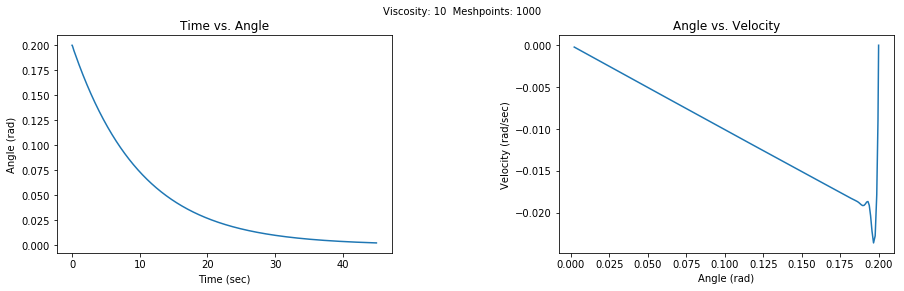

In [41]:
eulerfunc(10,1000)

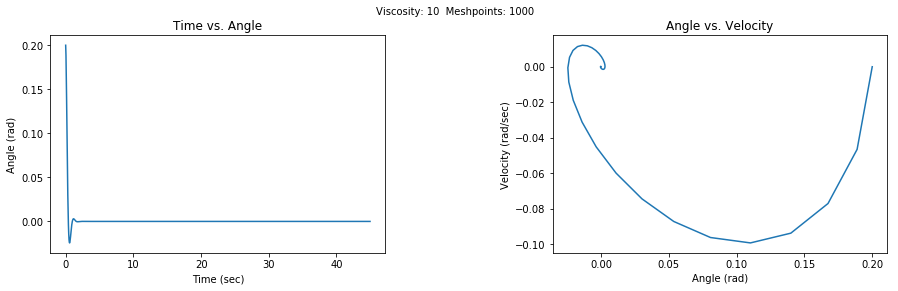

In [42]:
rungekuttafunc(10,1000)

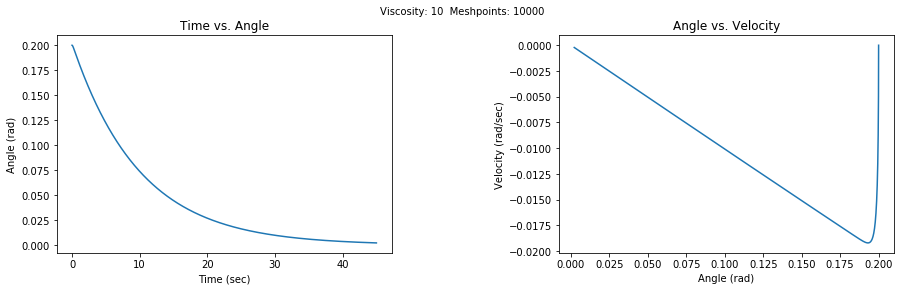

In [43]:
eulerfunc(10,10000)

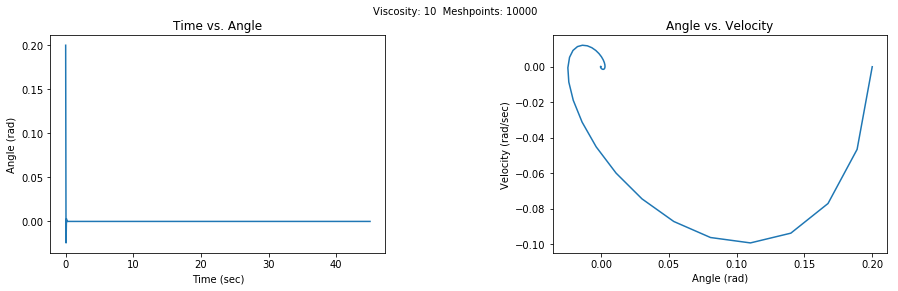

In [44]:
rungekuttafunc(10,10000)

In [24]:
#messing around with poincaire sections
psec = np.zeros(len(t))
for i in range(len(r)):
    if ((womega*t[i] <= (2*3.14))):
        psec[i] = r[i]
ax = plt.scatter(v,psec, s = 1)
#ax = plt.plot(markersize = 1)
#plt.scatter(v,psec, MarkerStyle = ".")

NameError: name 't' is not defined

0.03